In [2]:
import matplotlib.pyplot as plt
import sqlite3
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import os
from tqdm import tqdm

In [3]:
os.chdir('C:\\Users\\chandan.malla\\Desktop\\Data Science_chandan\\Applied AI notes\\NLP\\Amazon Fine Food reviews')
os.listdir()

['.ipynb_checkpoints',
 'BOW,TFIDF,W2V,AVGw2v, avg tfidif.ipynb',
 'database.sqlite',
 'final2.sqlite',
 'GoogleNews-vectors-ngative300.bin',
 'hashes.txt',
 'Pre-Proccessed_30000.sqlite',
 'Pre-Processed_30000.sqlite',
 'Reviews.csv']

In [4]:
con = sqlite3.connect('./database.sqlite')
raw_data = pd.read_sql_query('select * from reviews',con)

# PreProcessing

In [5]:
temp = raw_data['Score']
temp = temp.map(lambda x:1 if x>3 else 0)
raw_data['Score'] = temp
raw_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,0,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,1,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [6]:
final = raw_data.drop_duplicates({'UserId','ProfileName', 'Time','Text'},keep = 'first' , inplace = False)

In [7]:
final = final[final['HelpfulnessNumerator']<=final['HelpfulnessDenominator']]

In [8]:
#######Sample only 30000 points
final = final.sample(n=30000,random_state=0).reset_index()

# Text PreProcessing

In [9]:
##### regular Expression https://pymotw.com/2/re
from bs4 import BeautifulSoup
import re
##Remove all http links
def remhttp(text): 
    text = re.sub(r'http\S+',' ',text) ##\S is all the non-whitespace character + - one or more
    return text

##Remove all html tags
def remhtml(text):
    soup = BeautifulSoup(text, 'lxml')
    text = soup.get_text()
    return text

##Remove all punct. or special characters
def remchar(text):
    text = re.sub(r'[^A-Za-z0-9\s]+',' ',text)
    return text

##Remove all words less than 3 letters
def remles2letter(text):
    text = re.sub(r'\W*\b\w{1,3}\b',' ',text)
    return text
##convert to lower
def lower(text):
    text = text.lower()
    return text


def allconvert(text):
    return lower(remles2letter(remchar(remhtml(remhttp(text)))))
final['Score'][1]

1

In [10]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer

#import nltk
#nltk.download('stopwords')                                     download stopwords

#stop = set(stopwords.words('english'))

##we can use set stopwords manually also.
stop= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])
sno = SnowballStemmer('english')
#stop = set(stopwords.words('english'))
print(stop)

{'my', "she's", 'if', 'shouldn', 'so', "shan't", 'i', 'be', 'wouldn', 'being', "mustn't", 've', 'they', 'at', 'herself', 'during', "won't", 'any', 'very', 'haven', 'where', "it's", "you're", 'with', 'into', 'do', 'me', 'yourselves', 'shan', 'only', 'few', 'after', 'hadn', 'about', 'ma', 'does', 'before', 'd', 'most', 'to', 'it', 'your', 'ain', 'his', 't', 'mightn', 'will', 'such', 'and', 'why', 'was', 'didn', "shouldn't", 'under', 'aren', 'them', 'what', 'other', 'doesn', "you'd", 'you', 'is', 'isn', 'we', "wasn't", 'were', 'themselves', 'for', 'myself', 'mustn', 'below', "you'll", 'over', 'weren', 'hers', 'how', 'did', 'her', 'through', 'now', 'which', 'ourselves', 'has', 'or', 'don', "don't", 'all', 'there', 'up', 'then', 'once', 're', 'some', 'out', 'an', 'too', 'until', 'again', 'y', 'been', 'from', 'couldn', 'yourself', "couldn't", 'doing', 'same', 'of', 'when', 'yours', 'this', "needn't", 'against', 'in', 'theirs', 'have', "didn't", 'm', "mightn't", "isn't", 'just', 'because', 'a

In [11]:
###CODE to do actual Pre-Processing for ['Text']:

i=-1
all_positive_words=[]
all_negative_words=[]
final_text=[]
for text in final['Text']:
    i = i+1
    filtered_words=[]
    text = allconvert(text)
    for w in text.split():
        if (w not in stop):
           # s =(sno.stem(w)).encode('utf8')
            filtered_words.append(w)
            if (final['Score'].values)[i]==1:
                all_positive_words.append(w)
            if (final['Score'].values)[i]==0:
                all_negative_words.append(w)
        else:
            continue
    str =' '.join(filtered_words)
    final_text.append(str)


                
    

In [ ]:
final['Cleanedtext'] = final_text
#final['Cleanedsummary'] = final_text

conn = sqlite3.connect('Pre-Proccessed_30000.sqlite')
c = conn.cursor()
conn.text_factory = str


##Using this attribute you can control what objects are returned for the TEXT data type.
##By default, this attribute is set to unicode and the sqlite3 module will return Unicode objects for TEXT.
##If you want to return bytestrings instead, you can set it to str.


final.to_sql('Reviews',conn,schema=None,if_exists='replace')

## Sorting by time as this data has time as its column

In [13]:
sorted_data=final.sort_values('Time', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

# BOW

In [105]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(sorted_data['Cleanedtext'],sorted_data['Score'],test_size=0.3,random_state=0)



Here the fit method, when applied to the training dataset,learns the model parameters (for example, mean and standard deviation). We then need to apply the transform method on the training dataset to get the transformed (scaled) training dataset. We could also perform both of this steps in one step by applying fit_transform on the training dataset.

Then why do we need 2 separate methods - fit and transform ?

In practice we need to have a separate training and testing dataset and that is where having a separate fit and transform method helps. We apply fit on the training dataset and use the transform method on both - the training dataset and the test dataset. Thus the training as well as the test dataset are then transformed(scaled) using the model parameters that were learnt on applying the fit method the training dataset.

In [106]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(min_df=10, max_features=500)
train_bow = count_vect.fit_transform(x_train)
test_bow = count_vect.transform(x_test)
CV_bow = count_vect.transform(x_cv)

# TFIDF

In [107]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_count_vect = TfidfVectorizer(min_df=10, max_features=500,ngram_range=(1,2))
train_tfidf = tfidf_count_vect.fit_transform(x_train)
test_tfidf = tfidf_count_vect.transform(x_test)
CV_tfidf = tfidf_count_vect.transform(x_cv)

# AVG W2V

In [108]:
list_of_sentence = [ ]

##We need to clear data first of punctuation, html,upper case letter
for sent in x_train:
    list_of_sentence.append(sent.split())


In [109]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors ##to load google's model

w2v_model = Word2Vec(list_of_sentence,min_count=5,size=50,workers=4)
#min_count- denotes not to take words with less than 5 count
#size- size of vector
#workers- no. of core
print(w2v_model.wv.most_similar('great'))

[('good', 0.8238034248352051), ('awesome', 0.8125450015068054), ('fantastic', 0.8063198924064636), ('amazing', 0.8059506416320801), ('excellent', 0.8046004772186279), ('wonderful', 0.7891850471496582), ('delicious', 0.7254528999328613), ('perfect', 0.6782677173614502), ('well', 0.6713117361068726), ('super', 0.6590572595596313)]


In [110]:
sent_vectors_avgw2v = [ ];

for sent in list_of_sentence:
    sent_vec = np.zeros(50)
    cnt_words = 0;
    for word in sent:
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words +=1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors_avgw2v.append(sent_vec)
    

C:\Users\chandan.malla\AppData\Local\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


In [111]:
sent_vectors_avgw2v = np.nan_to_num(sent_vectors_avgw2v) ## REplaces nan to with zero and infinity with some large number

## Avg W2V for CV

In [112]:
##CV###
list_of_sentence = [ ]

##We need to clear data first of punctuation, html,upper case letter
for sent in x_cv:
    list_of_sentence.append(sent.split())
    
w2v_model_cv = Word2Vec(list_of_sentence,min_count=5,size=50,workers=4)
#min_count- denotes not to take words with less than 5 count
#size- size of vector
#workers- no. of core

sent_vectors_avgw2v_cv = [ ];

for sent in list_of_sentence:
    sent_vec = np.zeros(50)
    cnt_words = 0;
    for word in sent:
        try:
            vec = w2v_model_cv.wv[word]
            sent_vec += vec
            cnt_words +=1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors_avgw2v_cv.append(sent_vec)

sent_vectors_avgw2v_cv = np.nan_to_num(sent_vectors_avgw2v_cv) ## REplaces nan to with zero and infinity with some large number

C:\Users\chandan.malla\AppData\Local\anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide


## AVG W2V for Test

In [113]:
##test###
list_of_sentence = [ ]

##We need to clear data first of punctuation, html,upper case letter
for sent in x_test:
    list_of_sentence.append(sent.split())
    
w2v_model_test = Word2Vec(list_of_sentence,min_count=5,size=50,workers=4)
#min_count- denotes not to take words with less than 5 count
#size- size of vector
#workers- no. of core

sent_vectors_avgw2v_test = [ ];

for sent in list_of_sentence:
    sent_vec = np.zeros(50)
    cnt_words = 0;
    for word in sent:
        try:
            vec = w2v_model_test.wv[word]
            sent_vec += vec
            cnt_words +=1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors_avgw2v_test.append(sent_vec)

sent_vectors_avgw2v_test = np.nan_to_num(sent_vectors_avgw2v_test) ## REplaces nan to with zero and infinity with some large number

C:\Users\chandan.malla\AppData\Local\anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide


# TFIDF W2V

In [114]:
list_of_sentence = [ ]

##We need to clear data first of punctuation, html,upper case letter
for sent in x_train:
    list_of_sentence.append(sent.split())

sent_vectors_tfidf_w2v = [ ];
feature_name = tfidf_count_vect.get_feature_names()

row = 0
for sent in list_of_sentence:
    sent_vec = np.zeros(50)
    weight = 0;
    for word in sent:
        try:
            vec = w2v_model.wv[word]
            tfidf_value = train_tfidf[row,feature_name.index(word)]
            sent_vec += vec * tfidf_value
            weight += tfidf_value
        except:
            pass
   
    sent_vec /= weight
    sent_vectors_tfidf_w2v.append(sent_vec)
    row += 1
        

C:\Users\chandan.malla\AppData\Local\anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


In [115]:
sent_vectors_tfidf_w2v = np.nan_to_num(sent_vectors_tfidf_w2v) ## REplaces nan to with zero and infinity with some large number

## TFIDF W2V for CV

In [116]:
list_of_sentence = [ ]

##We need to clear data first of punctuation, html,upper case letter
for sent in x_cv:
    list_of_sentence.append(sent.split())

sent_vectors_tfidf_w2v_cv = [ ];
feature_name = tfidf_count_vect.get_feature_names()

row = 0
for sent in list_of_sentence:
    sent_vec = np.zeros(50)
    weight = 0;
    for word in sent:
        try:
            vec = w2v_model_cv.wv[word]
            tfidf_value = CV_tfidf[row,feature_name.index(word)]
            sent_vec += vec * tfidf_value
            weight += tfidf_value
        except:
            pass
   
    sent_vec /= weight
    sent_vectors_tfidf_w2v_cv.append(sent_vec)
    row += 1
sent_vectors_tfidf_w2v_cv = np.nan_to_num(sent_vectors_tfidf_w2v_cv) ## REplaces nan to with zero and infinity with some large number        

C:\Users\chandan.malla\AppData\Local\anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


## TFIDF W2V for test

In [117]:
list_of_sentence = [ ]

##We need to clear data first of punctuation, html,upper case letter
for sent in x_test:
    list_of_sentence.append(sent.split())

sent_vectors_tfidf_w2v_test = [ ];
feature_name = tfidf_count_vect.get_feature_names()

row = 0
for sent in list_of_sentence:
    sent_vec = np.zeros(50)
    weight = 0;
    for word in sent:
        try:
            vec = w2v_model_test.wv[word]
            tfidf_value = test_tfidf[row,feature_name.index(word)]
            sent_vec += vec * tfidf_value
            weight += tfidf_value
        except:
            pass
   
    sent_vec /= weight
    sent_vectors_tfidf_w2v_test.append(sent_vec)
    row += 1
sent_vectors_tfidf_w2v_test = np.nan_to_num(sent_vectors_tfidf_w2v_test) ## REplaces nan to with zero and infinity with some large number        

C:\Users\chandan.malla\AppData\Local\anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


# Brute Force KNN 

### FOR BOW

In [128]:
K = np.arange(21,51,2)

In [129]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

cv_acc =[]
tr_acc = []
for i in K:
    
    knn = KNeighborsClassifier(n_neighbors=i,algorithm = 'brute')
    knn.fit(train_bow,y_train)
    
    scores = cross_val_score(knn,train_bow,y_train,cv = 10,scoring='accuracy')
    cv_acc.append(scores.mean())
    pred_tr=knn.predict(train_bow)
    acc_tr = accuracy_score(y_train,pred_tr,normalize = 100) * 100
    tr_error = 1 - acc_tr/100
    tr_acc.append(tr_error)
    





Optimal value of K is 33


Text(0, 0.5, 'Misclassification Error Rate')

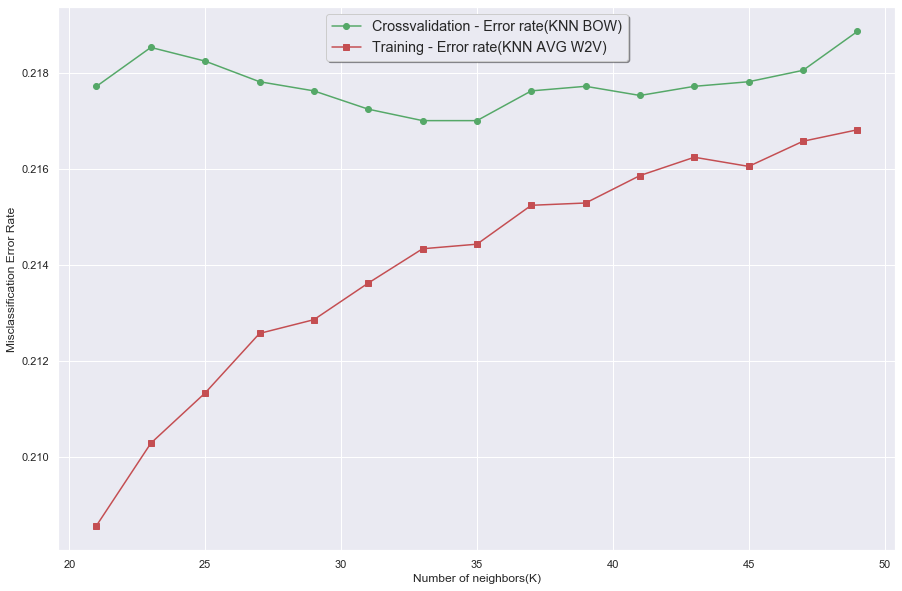

In [130]:
one_array = np.ones(len(cv_acc))
cv_err = list(one_array-cv_acc)
optimal_K = K[cv_err.index(min(cv_err))]
print('\n\nOptimal value of K is', K[cv_err.index(min(cv_err))] )

fig1,ax1 = plt.subplots(1,figsize=(15,10))

ax1.plot(K,cv_err,'go-',label='Crossvalidation - Error rate(KNN BOW)')
ax1.plot(K,tr_acc,'rs-',label='Training - Error rate(KNN AVG W2V)')
legend = ax1.legend(loc='upper center', shadow=True, fontsize='x-large')
ax1.set_xlabel('Number of neighbors(K)')
ax1.set_ylabel('Misclassification Error Rate')


In [131]:
##Training at optimal K

    
knn = KNeighborsClassifier(n_neighbors=optimal_K)
knn.fit(train_bow,y_train)

pred_test = knn.predict(test_bow)
probabilities = knn.predict_proba(test_bow)
acc_test = accuracy_score(y_test,pred_test,normalize = 100) * 100

print('Test Accuracy for K=',optimal_K)
print(acc_test)

Test Accuracy for K= 33
77.95555555555555


In [132]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import f1_score

fpr,tpr,thresholds = roc_curve(y_test,probabilities[:,1])

print ("\n Classification report : \n",classification_report(y_test,pred_test))
conf_matrix = confusion_matrix(y_test,pred_test)
model_roc_auc = roc_auc_score(y_test,pred_test)
print ("Area under curve : ",model_roc_auc,"\n")




 Classification report : 
               precision    recall  f1-score   support

           0       0.58      0.05      0.09      2013
           1       0.78      0.99      0.87      6987

    accuracy                           0.78      9000
   macro avg       0.68      0.52      0.48      9000
weighted avg       0.74      0.78      0.70      9000

Area under curve :  0.51975768496614 



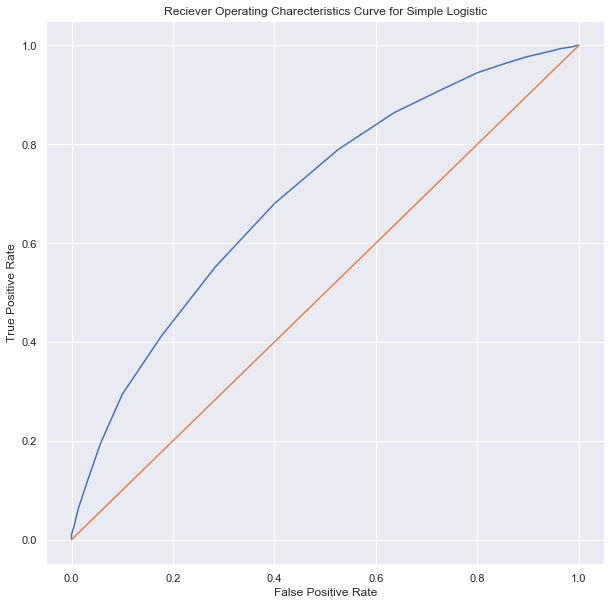

In [133]:
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(fpr,tpr)
ax.plot([0,1],[0,1])
ax.set_title('Reciever Operating Charecteristics Curve for Simple Logistic')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.show()

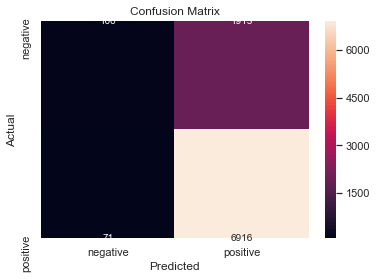

_____________________________________________________________________________________________________


,negative,positive
negative,100,1913
positive,71,6916


In [134]:
class_label = ['negative', 'positive']
df_conf_matrix = pd.DataFrame(
    conf_matrix, index=class_label, columns=class_label)
sns.heatmap(df_conf_matrix, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print("_" * 101)
df_conf_matrix


## For TFIDF

In [135]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
#K = np.arange(1,7,2)
cv_acc =[]
tr_acc = []
for i in K:
    
    knn = KNeighborsClassifier(n_neighbors=i,algorithm = 'brute')
    knn.fit(train_tfidf,y_train)
    
    scores = cross_val_score(knn,train_tfidf,y_train,cv = 10,scoring='accuracy')
    cv_acc.append(scores.mean())
    pred_tr=knn.predict(train_tfidf)
    acc_tr = accuracy_score(y_train,pred_tr,normalize = 100) * 100
    tr_error = 1 - acc_tr/100
    tr_acc.append(tr_error)
    





Optimal value of K is 43


Text(0, 0.5, 'Misclassification Error Rate')

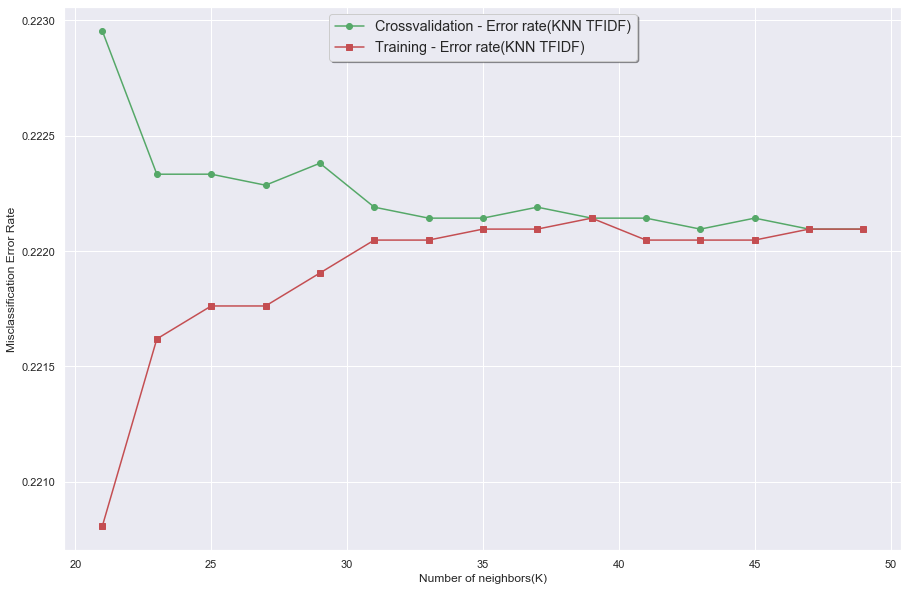

In [136]:
one_array = np.ones(len(cv_acc))
cv_err = list(one_array-cv_acc)
optimal_K = K[cv_err.index(min(cv_err))]
print('\n\nOptimal value of K is', K[cv_err.index(min(cv_err))] )

fig2,ax2 = plt.subplots(1,figsize=(15,10))

ax2.plot(K,cv_err,'go-',label='Crossvalidation - Error rate(KNN TFIDF)')
ax2.plot(K,tr_acc,'rs-',label='Training - Error rate(KNN TFIDF)')
legend = ax2.legend(loc='upper center', shadow=True, fontsize='x-large')
ax2.set_xlabel('Number of neighbors(K)')
ax2.set_ylabel('Misclassification Error Rate')

In [137]:
##Training at optimal K

    
knn = KNeighborsClassifier(n_neighbors=optimal_K)
knn.fit(train_tfidf,y_train)

pred_test = knn.predict(test_tfidf)
probabilities = knn.predict_proba(test_tfidf)
acc_test = accuracy_score(y_test,pred_test,normalize = 100) * 100

print('Test Accuracy for K=',optimal_K)
print(acc_test)

Test Accuracy for K= 43
77.63333333333333


In [138]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import f1_score

fpr,tpr,thresholds = roc_curve(y_test,probabilities[:,1])

print ("\n Classification report : \n",classification_report(y_test,pred_test))
conf_matrix = confusion_matrix(y_test,pred_test)
model_roc_auc = roc_auc_score(y_test,pred_test)
print ("Area under curve : ",model_roc_auc,"\n")



C:\Users\chandan.malla\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



 Classification report : 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      2013
           1       0.78      1.00      0.87      6987

    accuracy                           0.78      9000
   macro avg       0.39      0.50      0.44      9000
weighted avg       0.60      0.78      0.68      9000

Area under curve :  0.5 



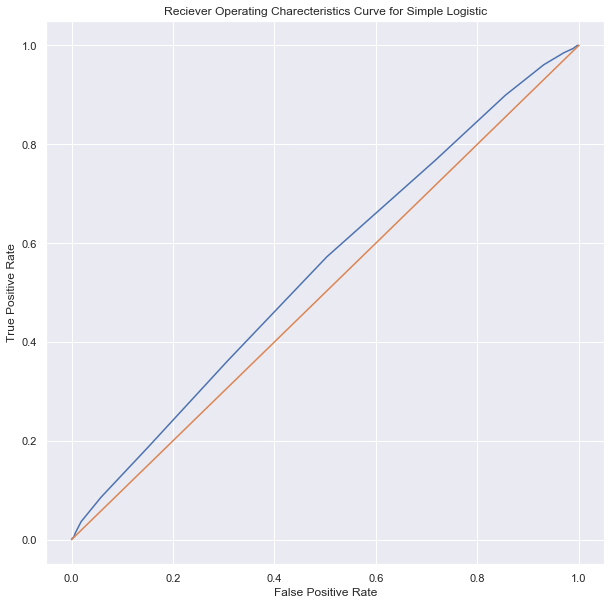

In [139]:
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(fpr,tpr)
ax.plot([0,1],[0,1])
ax.set_title('Reciever Operating Charecteristics Curve for Simple Logistic')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.show()

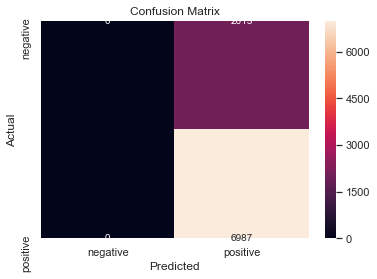

_____________________________________________________________________________________________________


,negative,positive
negative,0,2013
positive,0,6987


In [140]:
class_label = ['negative', 'positive']
df_conf_matrix = pd.DataFrame(
    conf_matrix, index=class_label, columns=class_label)
sns.heatmap(df_conf_matrix, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print("_" * 101)
df_conf_matrix


## For AVG W2V

In [141]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
#K = np.arange(5,9,2)
cv_acc =[]
tr_acc = []
for i in K:
    
    knn = KNeighborsClassifier(n_neighbors=i,algorithm = 'brute')
    knn.fit(sent_vectors_avgw2v,y_train)
    
    scores = cross_val_score(knn,sent_vectors_avgw2v,y_train,cv = 10,scoring='accuracy')
    cv_acc.append(scores.mean())
    pred_tr=knn.predict(sent_vectors_avgw2v)
    acc_tr = accuracy_score(y_train,pred_tr,normalize = 100) * 100
    tr_error = 1 - acc_tr/100
    tr_acc.append(tr_error)
    





Optimal value of K is 27


Text(0, 0.5, 'Misclassification Error Rate')

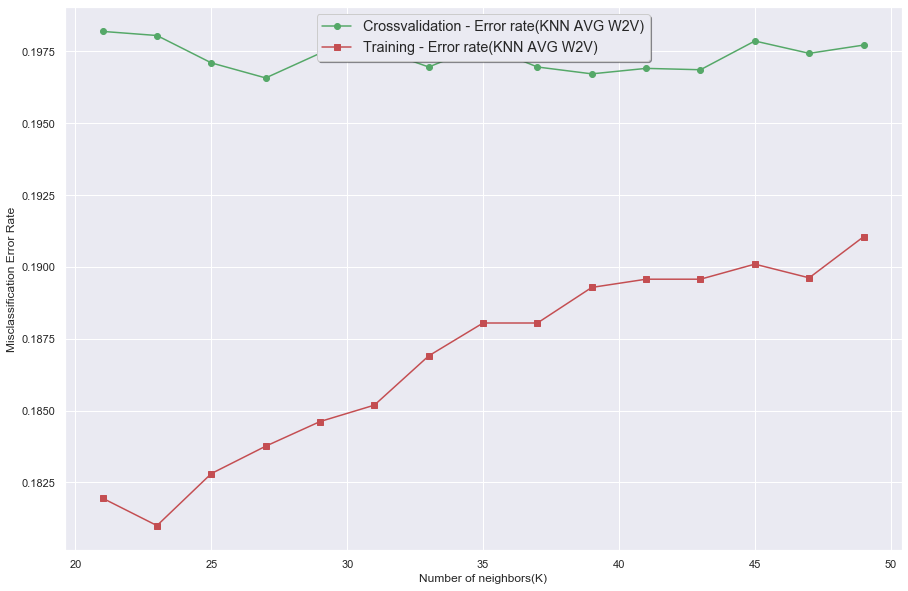

In [142]:
one_array = np.ones(len(cv_acc))
cv_err = list(one_array-cv_acc)

optimal_K = K[cv_err.index(min(cv_err))]

print('\n\nOptimal value of K is', K[cv_err.index(min(cv_err))] )

fig3,ax3 = plt.subplots(1,figsize=(15,10))

ax3.plot(K,cv_err,'go-',label='Crossvalidation - Error rate(KNN AVG W2V)')
ax3.plot(K,tr_acc,'rs-',label='Training - Error rate(KNN AVG W2V)')
legend = ax3.legend(loc='upper center', shadow=True, fontsize='x-large')
ax3.set_xlabel('Number of neighbors(K)')
ax3.set_ylabel('Misclassification Error Rate')

In [143]:
##Training at optimal K

    
knn = KNeighborsClassifier(n_neighbors=optimal_K)
knn.fit(sent_vectors_avgw2v,y_train)

pred_test = knn.predict(sent_vectors_avgw2v_test)
probabilities = knn.predict_proba(sent_vectors_avgw2v_test)
acc_test = accuracy_score(y_test,pred_test,normalize = 100) * 100

print('Test Accuracy for K=',optimal_K)
print(acc_test)

Test Accuracy for K= 27
76.27777777777777


In [144]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import f1_score

fpr,tpr,thresholds = roc_curve(y_test,probabilities[:,1])

print ("\n Classification report : \n",classification_report(y_test,pred_test))
conf_matrix = confusion_matrix(y_test,pred_test)
model_roc_auc = roc_auc_score(y_test,pred_test)
print ("Area under curve : ",model_roc_auc,"\n")




 Classification report : 
               precision    recall  f1-score   support

           0       0.28      0.04      0.07      2013
           1       0.78      0.97      0.86      6987

    accuracy                           0.76      9000
   macro avg       0.53      0.51      0.47      9000
weighted avg       0.67      0.76      0.69      9000

Area under curve :  0.505415422339593 



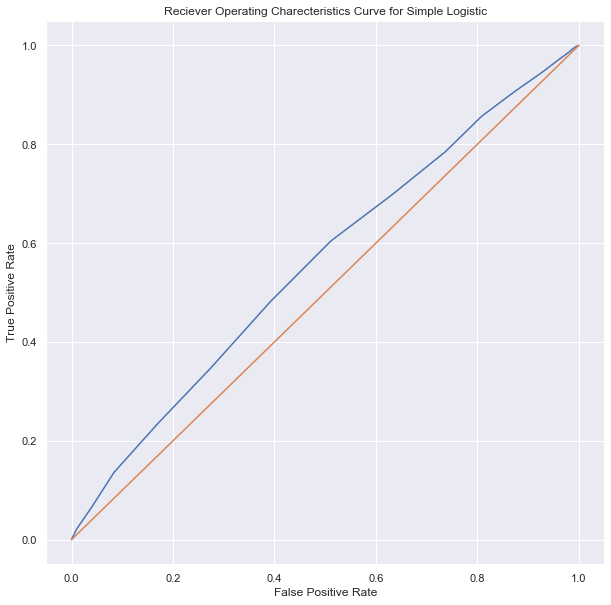

In [145]:
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(fpr,tpr)
ax.plot([0,1],[0,1])
ax.set_title('Reciever Operating Charecteristics Curve for Simple Logistic')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.show()

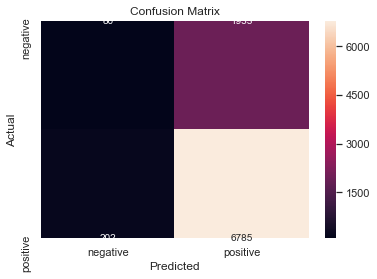

_____________________________________________________________________________________________________


,negative,positive
negative,80,1933
positive,202,6785


In [146]:
class_label = ['negative', 'positive']
df_conf_matrix = pd.DataFrame(
    conf_matrix, index=class_label, columns=class_label)
sns.heatmap(df_conf_matrix, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print("_" * 101)
df_conf_matrix


## for TFIDF W2V

In [147]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
#K = np.arange(5,9,2)
cv_acc =[]
tr_acc = []
for i in K:
    
    knn = KNeighborsClassifier(n_neighbors=i,algorithm = 'brute')
    knn.fit(sent_vectors_tfidf_w2v,y_train)
    
    scores = cross_val_score(knn,sent_vectors_tfidf_w2v,y_train,cv = 10,scoring='accuracy')
    cv_acc.append(scores.mean())
    pred_tr=knn.predict(sent_vectors_tfidf_w2v)
    acc_tr = accuracy_score(y_train,pred_tr,normalize = 100) * 100
    tr_error = 1 - acc_tr/100
    tr_acc.append(tr_error)
    





Optimal value of K is 35


Text(0, 0.5, 'Misclassification Error Rate')

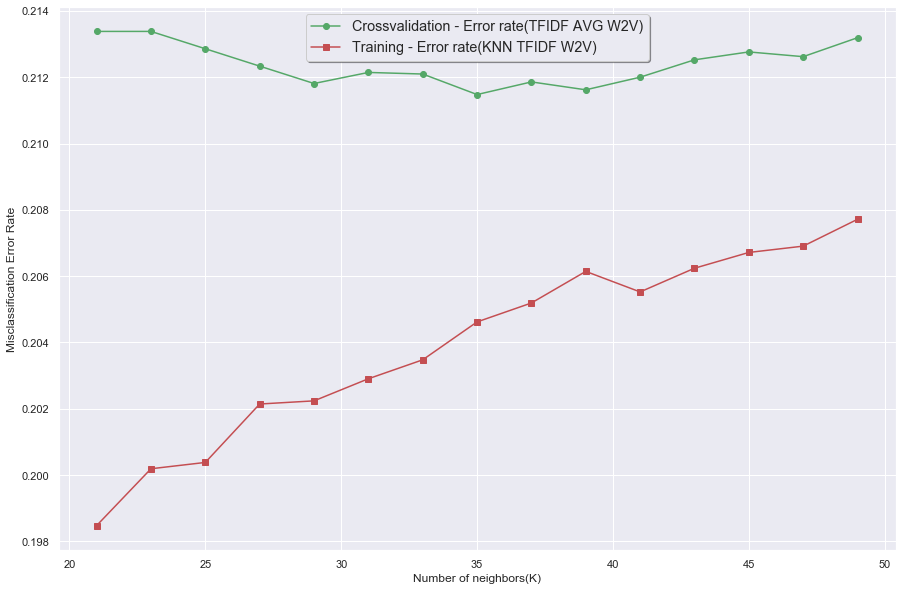

In [148]:
one_array = np.ones(len(cv_acc))
cv_err = list(one_array-cv_acc)

optimal_K = K[cv_err.index(min(cv_err))]

print('\n\nOptimal value of K is', K[cv_err.index(min(cv_err))] )

fig4,ax4 = plt.subplots(1,figsize=(15,10))

ax4.plot(K,cv_err,'go-',label='Crossvalidation - Error rate(TFIDF AVG W2V)')
ax4.plot(K,tr_acc,'rs-',label='Training - Error rate(KNN TFIDF W2V)')
legend = ax4.legend(loc='upper center', shadow=True, fontsize='x-large')
ax4.set_xlabel('Number of neighbors(K)')
ax4.set_ylabel('Misclassification Error Rate')

In [149]:
##Training at optimal K

    
knn = KNeighborsClassifier(n_neighbors=optimal_K)
knn.fit(sent_vectors_tfidf_w2v,y_train)

pred_test = knn.predict(sent_vectors_tfidf_w2v_test)
probabilities = knn.predict_proba(sent_vectors_tfidf_w2v_test)
acc_test = accuracy_score(y_test,pred_test,normalize = 100) * 100

print('Test Accuracy for K=',optimal_K)
print(acc_test)

Test Accuracy for K= 35
77.42222222222223


In [150]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import f1_score

fpr,tpr,thresholds = roc_curve(y_test,probabilities[:,1])

print ("\n Classification report : \n",classification_report(y_test,pred_test))
conf_matrix = confusion_matrix(y_test,pred_test)
model_roc_auc = roc_auc_score(y_test,pred_test)
print ("Area under curve : ",model_roc_auc,"\n")




 Classification report : 
               precision    recall  f1-score   support

           0       0.12      0.00      0.00      2013
           1       0.78      1.00      0.87      6987

    accuracy                           0.77      9000
   macro avg       0.45      0.50      0.44      9000
weighted avg       0.63      0.77      0.68      9000

Area under curve :  0.4991708041141767 



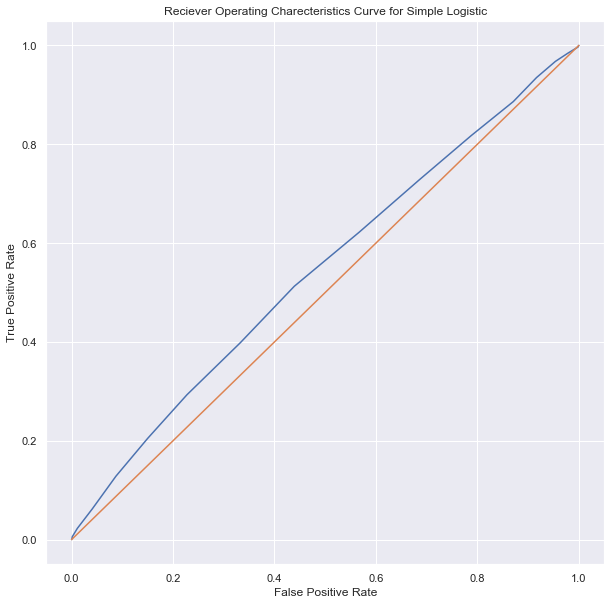

In [151]:
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(fpr,tpr)
ax.plot([0,1],[0,1])
ax.set_title('Reciever Operating Charecteristics Curve for Simple Logistic')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.show()

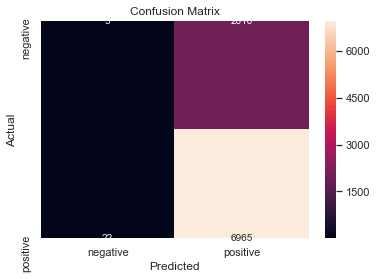

_____________________________________________________________________________________________________


,negative,positive
negative,3,2010
positive,22,6965


In [152]:
class_label = ['negative', 'positive']
df_conf_matrix = pd.DataFrame(
    conf_matrix, index=class_label, columns=class_label)
sns.heatmap(df_conf_matrix, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print("_" * 101)
df_conf_matrix


In [156]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Algorithm", "Mode", "AUC", "Value of K",'Test Accurcacy']
x.add_row(['BOW','Brute', 0.519 ,33,77.95])
x.add_row(['TFIDF','Brute', 0.5 ,43 ,77.2])
x.add_row(['AVGW2V','Brute',0.505 , 27,76.27])
x.add_row(['AVGTFIDF','Brute',0.499 , 35,77.43])


In [157]:
print(x)

+-----------+-------+-------+------------+----------------+
| Algorithm |  Mode |  AUC  | Value of K | Test Accurcacy |
+-----------+-------+-------+------------+----------------+
|    BOW    | Brute | 0.519 |     33     |     77.95      |
|   TFIDF   | Brute |  0.5  |     43     |      77.2      |
|   AVGW2V  | Brute | 0.505 |     27     |     76.27      |
|  AVGTFIDF | Brute | 0.499 |     35     |     77.43      |
+-----------+-------+-------+------------+----------------+


# Conclusion
    - BOW performs best among all the algorithm
    - Training time takes long time due to higher dimensionality
    -  TFIDF/AVGTFIDF/AVGW2V do not perform good for '0' class
    -   AVG W2V have poorest performance as with increase in k training error increase and cross validation remains almost similar